In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("sample_submission.csv",encoding = "ISO-8859-1")
sample.head(2)

,id,target
0,0,0
1,2,0


In [3]:
sample.shape

(3263, 2)

In [4]:
sample.target.value_counts()

0    3263
Name: target, dtype: int64

In [5]:
test_limpio = pd.read_csv("test_limpio.csv",encoding = "ISO-8859-1")
test_limpio.head(2)

,id,keyword,location,text,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,letras_seguidas,sentimiento,...,patience jonathan,plans to,police post,provoke outrage,read by,rescuers are,insultos_por_tweet,expresiones_por_tweet,kill,died
0,0,NaN,NaN,just happened a terrible car crash,0,0,1,40,2,-1.00,...,0,0,0,0,0,0,0,0,0,0
1,2,NaN,NaN,heard about earthquake is different cities sta...,0,0,1,70,2,0.25,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_limpio_sin_texto = test_limpio.drop(['text','keyword','location'], axis=1)
test_limpio_sin_texto.head()

,id,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,letras_seguidas,sentimiento,objetividad,the,a,...,patience jonathan,plans to,police post,provoke outrage,read by,rescuers are,insultos_por_tweet,expresiones_por_tweet,kill,died
0,0,0,0,1,40,2,-1.00,1.00,0,4,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,70,2,0.25,0.55,0,6,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,100,2,0.00,0.00,3,7,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,1,40,1,0.00,0.00,0,3,...,0,0,0,0,0,0,0,0,0,0
4,11,0,0,1,50,2,0.00,0.00,0,4,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_limpio = pd.read_csv("train_limpio.csv",encoding = "ISO-8859-1")
train_limpio.head(2)

,text,target,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,letras_seguidas,sentimiento,objetividad,the,...,patience jonathan,plans to,police post,provoke outrage,read by,rescuers are,insultos_por_tweet,expresiones_por_tweet,kill,died
0,our deeds are the reason of this earthquake ma...,1,0,0,1,70,2,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,forest fire near la ronge sask canada,1,0,0,1,40,1,0.1,0.4,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_x=train_limpio.drop(['text', 'target'], axis=1)
df_x.head()

,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,letras_seguidas,sentimiento,objetividad,the,a,to,...,patience jonathan,plans to,police post,provoke outrage,read by,rescuers are,insultos_por_tweet,expresiones_por_tweet,kill,died
0,0,0,1,70,2,0.00000,0.0000,1,8,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,40,1,0.10000,0.4000,0,6,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,130,2,-0.01875,0.3875,1,8,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,60,1,0.00000,0.0000,0,4,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,90,2,0.00000,0.0000,0,5,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_y=train_limpio.target
df_y

0       1
1       1
2       1
3       1
4       1
       ..
7129    1
7130    1
7131    1
7132    1
7133    1
Name: target, Length: 7134, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [11]:
x_train.dtypes

cantidad_links              int64
cantidad_signos_pregunta    int64
repeticiones                int64
longitud_tweet              int64
letras_seguidas             int64
                            ...  
rescuers are                int64
insultos_por_tweet          int64
expresiones_por_tweet       int64
kill                        int64
died                        int64
Length: 811, dtype: object

In [12]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

## Error de entrenamiento

In [13]:
pred = rf.predict(x_train)
pred

array([1, 0, 0, ..., 0, 1, 1])

In [14]:
y_train.values

array([1, 0, 0, ..., 0, 1, 1])

In [15]:
count = 0
for i in range( len(pred)):
    if pred[i]==y_train.values[i]:
        count = count+1
print(count)
print(len(pred))
print(count/len(pred))

5661
5707
0.9919397231470124


### Bastante bien...demasiado quizas, overfitting?

## Error de test

In [16]:
pred = rf.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [17]:
y_test.values

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
count = 0
for i in range( len(pred)):
    if pred[i]==y_test.values[i]:
        count = count+1
print(count)
print(len(pred))
print(count/len(pred))

1039
1427
0.7281009110021023


In [19]:
#0.7365101611772951

In [20]:
#
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [21]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [22]:
train_sin_texto = train_limpio.drop('text',axis=1)

In [23]:
for train_index,test_index in kf.split(train_sin_texto):
    x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
    y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
    rf= RandomForestClassifier(n_estimators=50)
    rf.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = rf.predict(x_train)
    print('Error de entrenamiento: ',f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = rf.predict(x_test)
    print('Error de test: ',f1_score(y_test.values, pred, average='macro'))
    
    
    
    
    #x_train = train.drop['target']
    #x_test = test.drop['target']
    #y_train = train.target
    #y_test = test.target
    #print(train,test)

Error de entrenamiento:  0.9905095087680623
Error de test:  0.6839162062447749
Error de entrenamiento:  0.9893671870038758
Error de test:  0.6669168630861119
Error de entrenamiento:  0.9910265144656112
Error de test:  0.6650708555671787
Error de entrenamiento:  0.9911839510790827
Error de test:  0.6832258380801453
Error de entrenamiento:  0.9896621982619405
Error de test:  0.6815799850819306


In [24]:
# Grid search

In [25]:
grid_param = {
    'n_estimators': [20,40,60,80,100,120,140],
    'min_samples_split' : [4,8,12,16,20],
    'min_samples_leaf': [1,4,7,10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [50]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [51]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5) #cross_validation, osea que gridd search usa los k-folds

In [52]:
#gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 4, 7, 10],
                         'min_samples_split': [4, 8, 12, 16, 20],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140]},
             scoring='accuracy')

In [53]:
#best_parameters = gd_sr.best_params_
#print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}


### El mejor resultado fue con:
### {'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}

In [33]:
for train_index,test_index in kf.split(train_sin_texto):
    x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
    y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
    rf= RandomForestClassifier(bootstrap= True,\
                                   min_samples_leaf= 4, min_samples_split= 20, n_estimators= 100)
    rf.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = rf.predict(x_train)
    print('Error de entrenamiento: ',f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = rf.predict(x_test)
    print('Error de test: ',f1_score(y_test.values, pred, average='macro'))
    

Error de entrenamiento:  0.8299368494471562
Error de test:  0.6957890248796148
Error de entrenamiento:  0.8341627502447568
Error de test:  0.6761277481580309
Error de entrenamiento:  0.8243636181780513
Error de test:  0.6558647994598017
Error de entrenamiento:  0.8314654854189738
Error de test:  0.6910682253974145
Error de entrenamiento:  0.8213823347344088
Error de test:  0.6893479510250866


Realizo devuelta grid search para mayor precision alrededor de los valroes optimos encontrados antes

In [58]:
grid_param = {
    'n_estimators': [90,95,100,105,110,105],
    'min_samples_split' : [18,20,23,26,30],
    'min_samples_leaf': [3,4,5,6],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

In [59]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [60]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5) #cross_validation, osea que gridd search usa los k-folds

In [61]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [18, 20, 23, 26, 30],
                         'n_estimators': [90, 95, 100, 105, 110, 105]},
             scoring='accuracy')

In [62]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}


## El optimo fue el mismo que el anterior
{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}


Realizo otra vez grid search con los valores optimos y teniendo en cuenta otros 2 hiperparametros

In [77]:
grid_param = {
    'n_estimators': [100],
    'min_samples_split' : [22],
    'min_samples_leaf': [4],
    'max_features' : [5,10,15,20,25,30],
    'max_depth' : [10,30,50,70,90],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

In [78]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [79]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5) #cross_validation, osea que gridd search usa los k-folds

In [80]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [10, 30, 50, 70, 90],
                         'max_features': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [4], 'min_samples_split': [22],
                         'n_estimators': [100]},
             scoring='accuracy')

In [81]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 22, 'n_estimators': 100}


El resultado fue:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 22, 'n_estimators': 100}

Realizo devuelta grid search para mayor precision alrededor de los valroes optimos encontrados antes

In [99]:
grid_param = {
    'n_estimators': [100],
    'min_samples_split' : [22],
    'min_samples_leaf': [4],
    'max_features' : [15,20,25,30,35,40,45,50,55,60],
    'max_depth' : [20,30,40,50,60,80,100],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

In [100]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [101]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5) #cross_validation, osea que gridd search usa los k-folds

In [102]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [20, 30, 40, 50, 60, 80, 100],
                         'max_features': [15, 20, 25, 30, 35, 40, 45, 50, 55,
                                          60],
                         'min_samples_leaf': [4], 'min_samples_split': [22],
                         'n_estimators': [100]},
             scoring='accuracy')

In [103]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 22, 'n_estimators': 100}


## Los mejores hyperparametros son, entonces:
### {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 22, 'n_estimators': 100}

## Los evaluo con k-folds

In [117]:
for train_index,test_index in kf.split(train_sin_texto):
    x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
    y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
    rf= RandomForestClassifier(bootstrap= True, max_depth=40, max_features=23,\
                               min_samples_leaf= 4, min_samples_split= 22, n_estimators= 100)
    rf.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = rf.predict(x_train)
    print('Error de entrenamiento: ',f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = rf.predict(x_test)
    print('Error de test: ',f1_score(y_test.values, pred, average='macro'))

Error de entrenamiento:  0.8138382996785173
Error de test:  0.7035195368228597
Error de entrenamiento:  0.8172444250389359
Error de test:  0.6730453749782336
Error de entrenamiento:  0.8036390243466361
Error de test:  0.6580462916676584
Error de entrenamiento:  0.8192488231932866
Error de test:  0.6941397783912853
Error de entrenamiento:  0.8133432744063153
Error de test:  0.6837241206204127


In [118]:
# Entonces, mi modelo optimizado es:
train_x=train_limpio.drop(['text', 'target'], axis=1)

train_y=train_limpio.target



rf= RandomForestClassifier(bootstrap= True, max_depth=40, max_features=23,\
                               min_samples_leaf= 4, min_samples_split= 22, n_estimators= 100)

rf.fit(train_x, train_y)
    
#error de entrenamiento, es el unico que puedo calcular:
pred = rf.predict(train_x)
print('Error de entrenamiento: ',f1_score(train_y, pred, average='macro'))

Error de entrenamiento:  0.8156281308104562


In [119]:
# Armo mi prediccion:

In [120]:
pred = rf.predict(test_limpio_sin_texto.drop(['id'],axis=1))

In [121]:
#Reutilizo el sample ya que tiene los ids
sample.target=pred

In [122]:
sample.to_csv('prediccion_random_forest.csv', index=False)

In [24]:
#!pip3 install bayesian-optimization
#from bayes_opt import BayesianOptimization

### Ortos hyperparametros con los que me dio inexplicablemente mejor
(apenas un 0.02 mejor pero igual)


In [108]:
for train_index,test_index in kf.split(train_sin_texto):
    x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
    y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
    rf= RandomForestClassifier(n_estimators=65, min_samples_split=6,\
                                   min_samples_leaf=1,max_features=6,max_depth=64)
    rf.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = rf.predict(x_train)
    print('Error de entrenamiento: ',f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = rf.predict(x_test)
    print('Error de test: ',f1_score(y_test.values, pred, average='macro'))

Error de entrenamiento:  0.9474362837675261
Error de test:  0.713741223671013
Error de entrenamiento:  0.9418733526001342
Error de test:  0.674487836569696
Error de entrenamiento:  0.926286105921152
Error de test:  0.6615275142314989
Error de entrenamiento:  0.9398041580012653
Error de test:  0.6992523737687462
Error de entrenamiento:  0.945271262647907
Error de test:  0.7022378306328764


In [109]:
# Entonces, mi modelo optimizado es:
train_x=train_limpio.drop(['text', 'target'], axis=1)

train_y=train_limpio.target



rf= RandomForestClassifier(n_estimators=90,\
                            min_samples_split=14,min_samples_leaf=1)

rf.fit(train_x, train_y)
    
#error de entrenamiento, es el unico que puedo calcular:
pred = rf.predict(train_x)
print('Error de entrenamiento: ',f1_score(train_y, pred, average='macro'))

Error de entrenamiento:  0.9547164479827017


In [40]:
list(set(train_x.columns.to_list()) - set(test_limpio_sin_texto.columns.to_list()))

[]

In [41]:
test_limpio_sin_texto.columns.to_list()

['id',
 'cantidad_links',
 'cantidad_signos_pregunta',
 'repeticiones',
 'longitud_tweet',
 'letras_seguidas',
 'sentimiento',
 'objetividad',
 'the',
 'a',
 'to',
 'in',
 'of',
 'and',
 'i',
 'is',
 'on',
 'for',
 'you',
 'my',
 'it',
 'that',
 'with',
 'at',
 'this',
 'by',
 'be',
 'are',
 'was',
 'from',
 'have',
 'like',
 'me',
 'but',
 'just',
 'so',
 'im',
 'not',
 'amp',
 'as',
 'up',
 'your',
 'out',
 'its',
 'all',
 'will',
 'no',
 'fire',
 'an',
 'when',
 'has',
 'if',
 'we',
 'after',
 'now',
 'get',
 'about',
 'new',
 'or',
 'they',
 'what',
 'dont',
 'via',
 'how',
 'one',
 'he',
 'people',
 'more',
 'news',
 'do',
 'been',
 'us',
 'can',
 'emergency',
 'over',
 'video',
 'there',
 'who',
 'into',
 'were',
 'police',
 'her',
 'would',
 'his',
 'disaster',
 'some',
 'body',
 'back',
 'storm',
 'still',
 'burning',
 'than',
 'got',
 'had',
 'off',
 'know',
 'them',
 'why',
 'man',
 'day',
 'time',
 'crash',
 'see',
 'buildings',
 'first',
 'rt',
 'cant',
 'going',
 'californ

In [42]:
train_x.columns.to_list()

['cantidad_links',
 'cantidad_signos_pregunta',
 'repeticiones',
 'longitud_tweet',
 'letras_seguidas',
 'sentimiento',
 'objetividad',
 'the',
 'a',
 'to',
 'in',
 'of',
 'and',
 'i',
 'is',
 'on',
 'for',
 'you',
 'my',
 'it',
 'that',
 'with',
 'at',
 'this',
 'by',
 'be',
 'are',
 'was',
 'from',
 'have',
 'like',
 'me',
 'but',
 'just',
 'so',
 'im',
 'not',
 'amp',
 'as',
 'up',
 'your',
 'out',
 'its',
 'all',
 'will',
 'no',
 'fire',
 'an',
 'when',
 'has',
 'if',
 'we',
 'after',
 'now',
 'get',
 'about',
 'new',
 'or',
 'they',
 'what',
 'dont',
 'via',
 'how',
 'one',
 'he',
 'people',
 'more',
 'news',
 'do',
 'been',
 'us',
 'can',
 'emergency',
 'over',
 'video',
 'there',
 'who',
 'into',
 'were',
 'police',
 'her',
 'would',
 'his',
 'disaster',
 'some',
 'body',
 'back',
 'storm',
 'still',
 'burning',
 'than',
 'got',
 'had',
 'off',
 'know',
 'them',
 'why',
 'man',
 'day',
 'time',
 'crash',
 'see',
 'buildings',
 'first',
 'rt',
 'cant',
 'going',
 'california',
 '

In [43]:
#Prediccion del text

In [44]:
pred = rf.predict(test_limpio_sin_texto.drop(['id'],axis=1))

In [45]:
pred

array([0, 0, 0, ..., 0, 1, 1])

In [46]:
sample.target=pred

In [47]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,1
4,11,0


In [48]:
sample.to_csv('prediccion_random_forest.csv', index=False)

In [53]:
def Nmaxelements(list1,valores, N): 
    final_list = [] 
    final_values = []

    for i in range(0, N):  
        max1 = 0
        value = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                #print(j)
                max1 = list1[j]; 
                value = valores[j]
                  
        valores.remove(value)
        final_values.append(value)
        
        
        list1.remove(max1); 
        final_list.append(max1) 
           
    return([final_list,final_values])
  
# Driver code 
N = 50
  
# Calling the function 
values_best_features,best_feaures = Nmaxelements(list(rf.feature_importances_),list(df_x.columns), N) 
values_best_features,best_feaures

([0.03732593960495181,
  0.025270200804130147,
  0.02397960938319522,
  0.01995266371587315,
  0.01899050081016794,
  0.016968591921733583,
  0.016500390487047906,
  0.014590392417647329,
  0.012586534366738558,
  0.012020045909740085,
  0.010381665277863302,
  0.00931202725256278,
  0.00897679375553909,
  0.00853641045629406,
  0.008159079705058669,
  0.008149118856787829,
  0.007939889524784487,
  0.007914137663413194,
  0.007564799449417208,
  0.007471025598330735,
  0.007290119920257022,
  0.007165029209202731,
  0.007068609524293612,
  0.006578697024565627,
  0.0064675445131163216,
  0.006255201070133378,
  0.0061438215497311025,
  0.0061238655038522195,
  0.006079721118100024,
  0.006074543330948476,
  0.005679744356954225,
  0.005467418224355018,
  0.005216418483867088,
  0.005108690580685026,
  0.004960272581790335,
  0.0048059395124992734,
  0.0044278987336393945,
  0.004352183651866341,
  0.00430748461923517,
  0.004195255429155623,
  0.004174713427927321,
  0.004029387000741

In [54]:
rf.feature_importances_[0,]

0.03732593960495181

In [55]:
df_x.columns[0]

'cantidad_links'

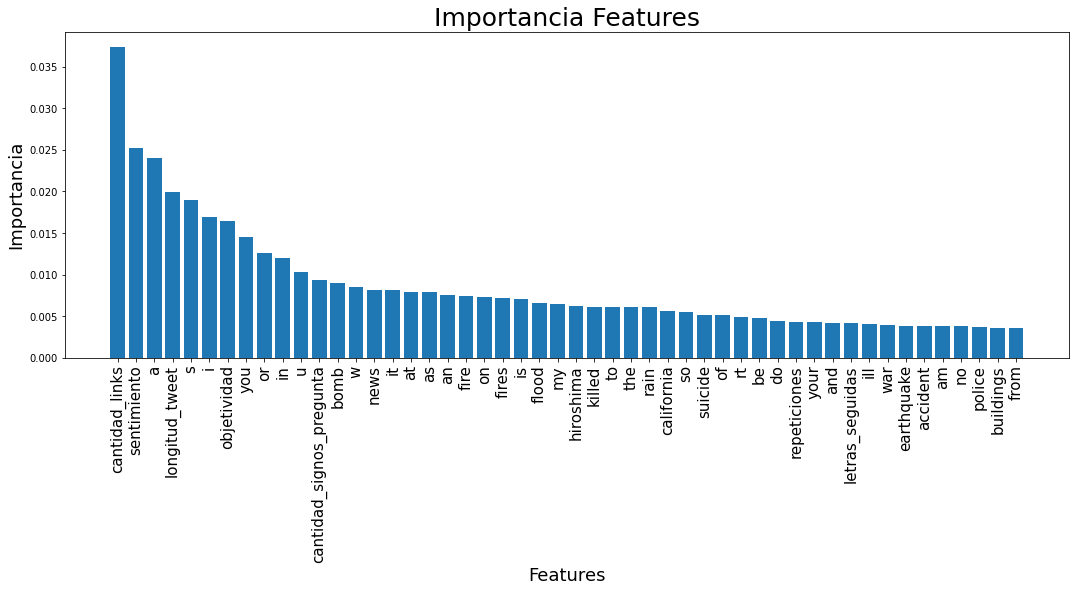

In [56]:
# Ploteo las features por importancia
#values_best_features,best_feaures
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(best_feaures, values_best_features)
plt.xlabel('Features',size=18)
plt.ylabel('Importancia',size=18)
plt.xticks(rotation=90, size=15)
plt.title('Importancia Features',size=25)
plt.show()

### Logré aumentar un poco el error de entrenamiento asegurandome de no overfittear

In [ ]:
#Habia conseguido que funcione metiendole el pip install acá mismo en lugar de desde la terminal
from bayes_opt import BayesianOptimization

In [ ]:
rf= RandomForestClassifier(n_estimators=50)
rf
#rf.fit(x_train, y_train)

In [ ]:
def evaluador_modelo(n_estimatorss):
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
    print(int(n_estimatorss))
    rf= RandomForestClassifier(n_estimators=best_value, min_weight_fraction_leaf=n_estimatorss)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    
    return(f1_score(y_test.values, pred, average='macro'))
    
    
RandomForestClassifier()

In [ ]:
pbound = {
    'n_estimatorss':  (1,4)
}

#pbound={"n_estimatorss": [int, (1, 100)]},

optimizer = BayesianOptimization(
    f=evaluador_modelo,
    pbounds=pbound,
    verbose=1,
    random_state=1,
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)